In [535]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
#Accessing performance using Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost scikit-learn
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Defaulting to user installation because normal site-packages is not writeable


In [536]:
df = pd.read_csv('Copper_Set_Data.csv')

C:\Users\rajij\AppData\Local\Temp\ipykernel_13280\2294043118.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Copper_Set_Data.csv')


In [537]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [538]:
##Understanding the Data

In [539]:
df.shape

(181673, 14)

In [540]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [541]:
df['country'].nunique()

17

In [542]:
df['country'].value_counts()

country
78.0     32084
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64

In [543]:
df['status'].nunique()

9

In [544]:
df['status'].value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [545]:
filtered_df = df[df['status'] == 'Lost']
filtered_df


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
171,C0BF3187-C4B3-4C63-ABDB-FCB0642A69C0,20210401.0,8.718789,30223403.0,78.0,Lost,W,10.0,1.00,1500.0,NaN,1668701718,20210701.0,1253.0
174,66D8E20C-AF4A-47D7-8FDD-51DEA6EA1F05,20210401.0,39.553513,30165992.0,77.0,Lost,S,10.0,1.00,1500.0,FZPA004640,164141591,20210801.0,1225.0
175,4532B5EF-0446-4880-BC8E-242E89AB8DD6,20210401.0,11.454558,30223403.0,78.0,Lost,W,10.0,4.00,1500.0,NaN,1668701718,20210701.0,1186.0
176,EE0BA8DE-38E9-4101-ADF9-B7B5B19A3525,20210401.0,37.655526,30165992.0,77.0,Lost,S,10.0,0.80,1250.0,FZPA004640,164141591,20210801.0,1249.0
179,1CDD04C3-6310-431F-B10A-F1C6B4F529DD,20210401.0,10.291602,30223403.0,78.0,Lost,W,10.0,0.80,1500.0,NaN,1668701718,20210701.0,1284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,20200702.0,63.85952061,30161559.0,30.0,Lost,S,10.0,5.85,1525.0,NaN,640665,20200801.0,457.0
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,20200702.0,56.02856191,30161559.0,30.0,Lost,S,10.0,7.85,1500.0,NaN,640665,20200801.0,458.0
181531,BF93A919-5970-428F-9467-7A2D0573C5C6,20200702.0,206.2241104,30161559.0,30.0,Lost,S,10.0,3.85,1830.0,NaN,640665,20200801.0,460.0
181533,FA54AED7-360E-4DED-96AA-F69D127267B8,20200702.0,102.9938488,30198408.0,25.0,Lost,S,10.0,1.40,1150.0,NaN,1668701718,20200701.0,725.0


In [546]:
df['item type'].nunique()

7

In [547]:
df['item type'].value_counts()

item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [548]:
df['application'].nunique()

30

In [549]:
df['application'].value_counts()

application
10.0    77544
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: count, dtype: int64

In [550]:
df['material_ref'].nunique()

16563

In [551]:
df['product_ref'].nunique()

33

In [552]:
df['product_ref'].value_counts()

product_ref
611993        45727
164141591     28785
640665        27375
1670798778    18916
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4561
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: count, dtype: int64

In [553]:
df['customer'].nunique()

1169

In [554]:
df['item type'].value_counts().index

Index(['W', 'S', 'PL', 'Others', 'WI', 'IPL', 'SLAWR'], dtype='object', name='item type')

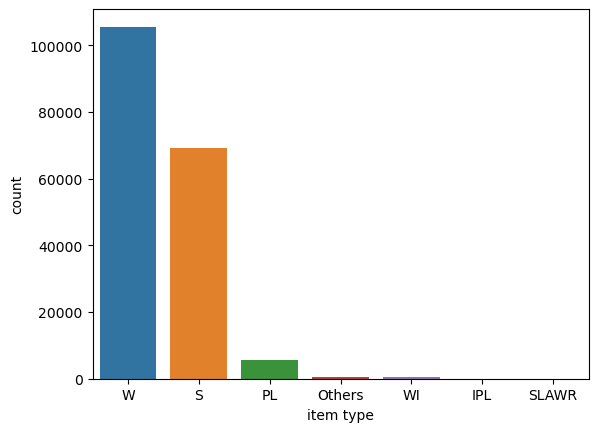

In [555]:
#Data distribution before processing using boxplot and barplot
sns.barplot(x= df['item type'].value_counts().index, y=df['item type'].value_counts())
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


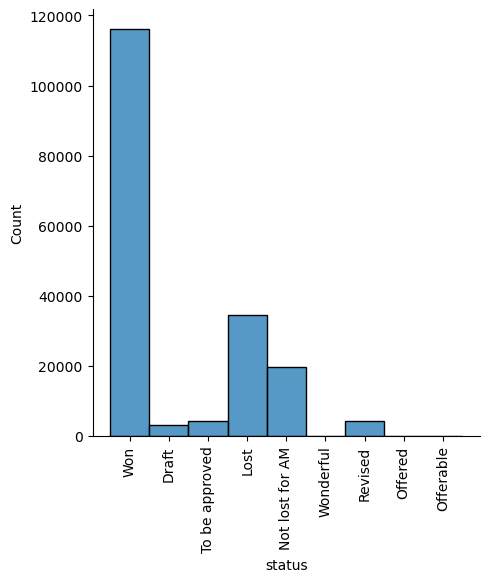

In [556]:
sns.displot(df['status'])
plt.xticks(rotation=90)
plt.show()

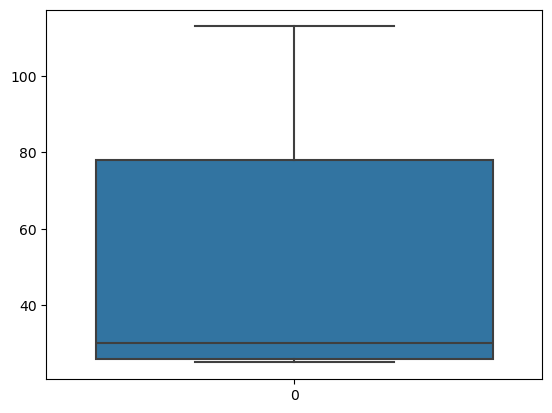

In [557]:
sns.boxplot(df['country'])
plt.show()

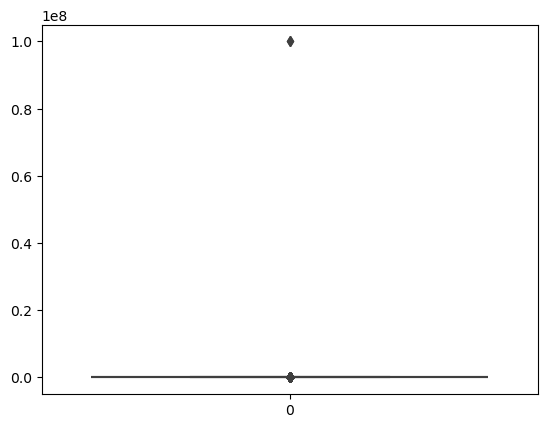

In [558]:
sns.boxplot(df['selling_price'])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


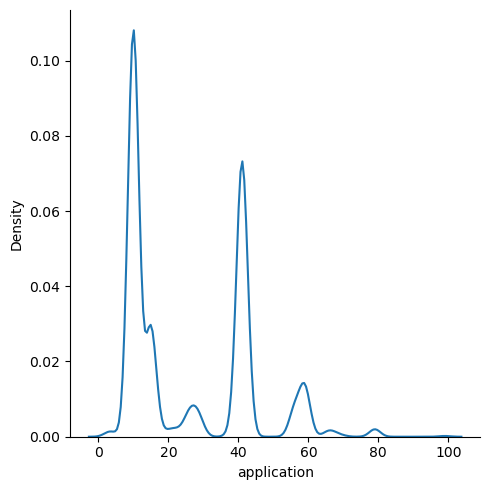

In [559]:
sns.displot(df['application'], kind='kde')
plt.show()

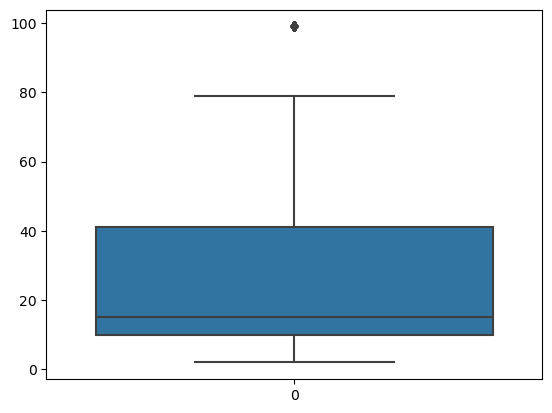

In [560]:
sns.boxplot(df['application'])
plt.show()

In [561]:
df['quantity tons'].value_counts()

quantity tons
54.15113862    1
75.11072642    1
32.43164392    1
31.92534499    1
132.3113848    1
              ..
13.86959008    1
2.738535634    1
233.2640131    1
11.94017945    1
406.6865384    1
Name: count, Length: 181673, dtype: int64

In [562]:
df['material_ref'].shape

(181673,)

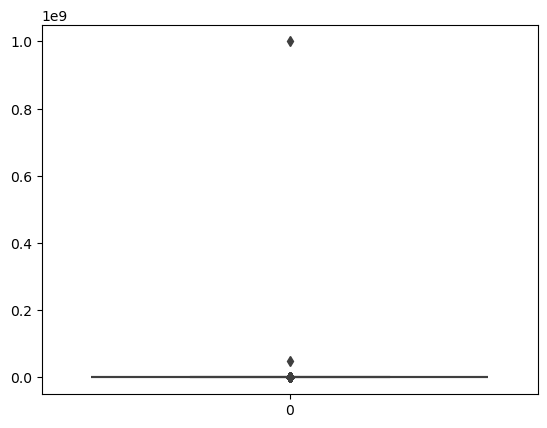

In [563]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
sns.boxplot(df['quantity tons'])
plt.show()

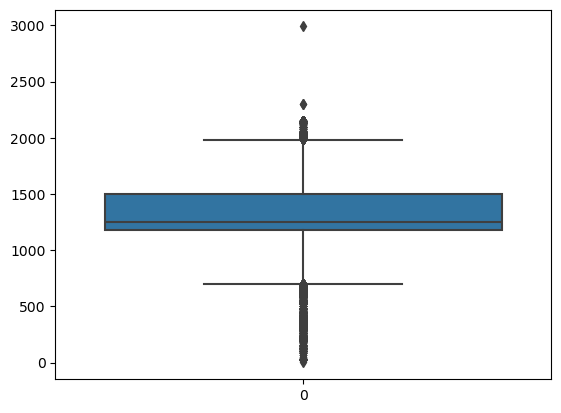

In [564]:
#df['width'] = pd.to_numeric(df['width'], errors='coerce')
sns.boxplot(df['width'])
plt.show()

In [565]:
##Data Pre=processing - 
#removing null values in material_ref
#other columns - replacing null values with mode, 
#Encoding the values, 
#removing values less than or equal to zero,
#data transformation using log funtion

In [566]:
df['material_ref'].fillna('NULL', inplace=True)

In [567]:
df['material_ref'].isnull().sum()

0

In [568]:
df['country'].mode()

0    78.0
Name: country, dtype: float64

In [569]:
df['country'].fillna(78.0, inplace=True)

In [570]:
df['country'].isnull().sum()

0

In [571]:
df['application'].mode()

0    10.0
Name: application, dtype: float64

In [572]:
df['application'].fillna(10.0, inplace=True)

In [573]:
df['application'].isnull().sum()

0

In [574]:
df = df.dropna()

In [575]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

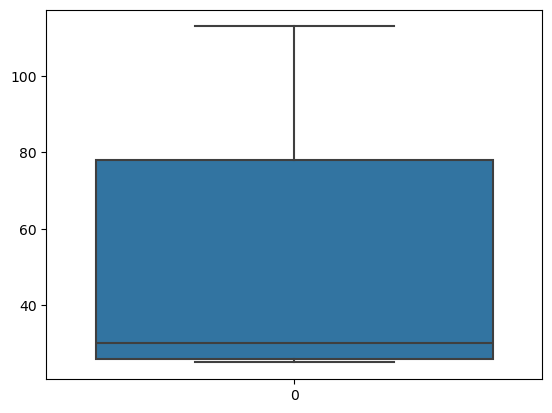

In [576]:
sns.boxplot(df['country'])
plt.show()

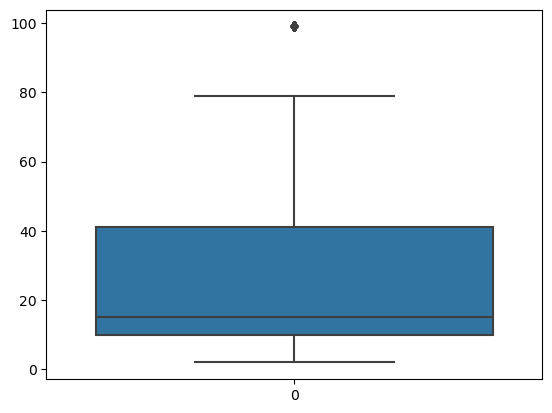

In [577]:
sns.boxplot(df['application'])
plt.show()

In [578]:
df['country'].value_counts()

country
78.0     32111
26.0     27515
25.0     23361
27.0     21508
32.0     18658
28.0     15823
84.0     12776
77.0      9714
30.0      8702
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: count, dtype: int64

In [579]:
df['item type'].value_counts()

item type
W         105610
S          69231
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [580]:
df['application'].value_counts()

application
10.0    77561
41.0    46260
15.0    20771
59.0     8926
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: count, dtype: int64

In [581]:

df = df[df['status'].isin(['Won', 'Lost'])]


In [582]:
df['status'].value_counts()

status
Won     116006
Lost     34436
Name: count, dtype: int64

In [583]:
df.shape

(150442, 14)

In [584]:
df.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [585]:
#Cleaning Material_ref column from unwanted info
df['material_ref'].value_counts()

material_ref
NULL                             62794
DX51D+Z                            851
DC01 RED.FLAT KUCHNIA EKO 2.2      776
G9010                              623
DC01                               600
                                 ...  
DX51DZ275-1324X0.8                   1
DX52DZ100-1242X0.3                   1
M5648                                1
M5649                                1
202006170005.IO.1.1                  1
Name: count, Length: 15821, dtype: int64

In [586]:
df['material_ref'] = df['material_ref'].replace(to_replace=r'^000000000000000000000000000000000.*', value=np.nan, regex=True)

In [587]:
df['material_ref'] = df['material_ref'].replace(to_replace=r'^000000000000000000000000000000000.*', value=np.nan, regex=True)

In [588]:
df['material_ref'] = df['material_ref'].replace(to_replace=r'^0000000000000000000000000000000.*', value=np.nan, regex=True)

In [589]:
df['material_ref'].isnull().sum()

16773

In [590]:
df['material_ref'].fillna('NULL', inplace=True)

In [591]:
df['material_ref'].isnull().sum()

0

In [592]:
df['material_ref'] = df['material_ref'].apply(lambda x: 'others' if x.startswith('000') else x)

In [593]:
df['material_ref'].value_counts()

material_ref
NULL                             79567
others                            2855
DX51D+Z                            851
DC01 RED.FLAT KUCHNIA EKO 2.2      776
G9010                              623
                                 ...  
HRCL_ST-37.2 LOWS 6.01X1265          1
HRCL_ST-37.2 LOWS 1.81X1265          1
LF 0701478DC04ED                     1
ACCESS A SPAIN                       1
202006170005.IO.1.1                  1
Name: count, Length: 10871, dtype: int64

In [594]:
value_counts = df['material_ref'].value_counts()
freq = (value_counts[value_counts<100]).index

unique_once_list = list(freq)
unique_once_list

['2_S355J2+N-CL1',
 'HC220CA',
 'A9002',
 'CLS05/000478',
 'S275JR+AR-CL1',
 'G7035',
 'DES1 S235JR',
 'typical basket',
 'G9007',
 'NABS3JRGS',
 '1_S235JR+AR-CL1',
 'BOB',
 'S235JR+AR DKP CCPU HUIL CVLT',
 '02570128AFDF73KRA',
 'DD11-CL1',
 'ELCL-ZX 25/25_DC01_2.2',
 'DEQ1 S420MC',
 'DX51D+ZM MAE',
 'DC01+ZE 025',
 'NANS5J3GS',
 'NEQ1 P295GH',
 'G3000',
 'NEQ1 S275JR+N',
 'S235JR+AR LARG SUP 1000 1ER',
 'S350GD+ZM310',
 'S355 MC NOIR CCPU CVLT',
 'S235JR+AR-CL1_6X1500_NOCISCVLT',
 'S355MC-CAT_A',
 'DD11-CAT.A_NON CIS_2.2',
 'S235JR-CL1',
 'DC01NOL RED.FLAT REGAL EKO 2.2',
 'BL_S355J2+N-CL1',
 'S250GD+ZM MAE',
 'S355MC',
 'G8017',
 'DC01+ZVI25/25',
 'DC01+ZVI 25/25',
 'DD13-CAT.A_NON CIS_3.1',
 'DC01-1250X1,5 CCPU',
 'G02CEZ0000002428LAC-DEC',
 '2_30MNB5+CR',
 'BL_S235JR-CL1',
 '1Z205060',
 'KRA DX51D+Z MAC',
 '0321RS1100NUOVO',
 'S250GD+Z',
 'BN001716',
 'BN030000',
 'BN002137',
 'BN001603',
 'BN001607',
 'BD002646',
 'ACIER AU BORE LAC_DKP',
 'G5010',
 'DX51.GR.FLEX-GRAINE.G30.DF',
 

In [595]:
df['material_ref'] = df['material_ref'].replace(unique_once_list, 'other')

In [596]:
df['material_ref'].value_counts()

material_ref
NULL                             79567
other                            57322
others                            2855
DX51D+Z                            851
DC01 RED.FLAT KUCHNIA EKO 2.2      776
G9010                              623
DC01                               600
G9006                              520
G9002                              481
G7016                              371
NEQ1 S355J2+N                      364
K DX51D+Z PROFILES                 363
DX51D+Z275 EKO 2.2                 356
S235JR+AR-CL1                      352
CLS05S700MC/000094                 315
S220GD+Z                           286
S235JR+N-CL1                       285
DES1 DD11-CL1AMFCE                 280
S355MC-CAT_A 3.1                   274
A9010                              252
typical item                       230
DX51D+Z275                         214
DX51D+Z_A                          183
S235JR+AR_CL1                      181
PI_S235JR-CL1                      170
CONSIGNMENT 

In [597]:
df['product_ref'].value_counts()

product_ref
611993        36094
164141591     24399
640665        23195
1670798778    16539
628377        15909
1668701718    11392
640405         8331
1671863738     4463
1332077137     3907
1693867550     1540
1668701376      977
1671876026      805
628117          555
164337175       450
1668701698      290
1693867563      264
1721130331      230
1282007633      203
628112          168
1665572374      149
1690738206      131
1722207579      125
611728           84
640400           81
611733           44
1668701725       44
164336407        37
1690738219       17
1665584320       12
1665572032        4
1665584642        2
929423819         1
Name: count, dtype: int64

In [598]:
#Feature engineering: Introducing new features
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

df['Delivery_time'] = df['delivery date'] - df['item_date']
df['Delivery_time'] = df['Delivery_time'].astype(str)
##lot of incorrect values..ignor
df['Delivery_time'] = df['Delivery_time'].fillna(0).astype(str)

df['Delivery_time'] = (df['Delivery_time'].str.extract('(\d+)'))
df['Delivery_time'] = pd.to_numeric(df['Delivery_time'], errors='coerce')

In [599]:
df['Delivery_time'].isnull().sum()

3

In [600]:
df = df.dropna()

In [601]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

OE = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['status'] = OE.fit_transform(df[['status']])
print(df)
OE1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['item type'] = OE1.fit_transform(df[['item type']])

OE2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df['material_ref'] = OE2.fit_transform(df[['material_ref']])

OE3 = OrdinalEncoder()
df['product_ref'] = OE3.fit_transform(df[['product_ref']])

                                          id   item_date  quantity tons  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE  2021-04-01      54.151139   
1       4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  2021-04-01     768.024839   
2       E140FF1B-2407-4C02-A0DD-780A093B1158  2021-04-01     386.127949   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50  2021-04-01     202.411065   
4       4E1C4E78-152B-430A-8094-ADD889C9D0AD  2021-04-01     785.526262   
...                                      ...         ...            ...   
181668  DE633116-D1DF-4846-982E-55EFC3658A76  2020-07-02     102.482422   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB  2020-07-02     208.086469   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320  2020-07-02       4.235594   
181671  7AFFD323-01D9-4E15-B80D-7D1B03498FC8  2020-07-02   -2000.000000   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC  2020-07-02     406.686538   

          customer  country  status item type  application  thickness   width  \
0       30156308.0

In [602]:
df['status'].value_counts()

status
1.0    116004
0.0     34435
Name: count, dtype: int64

In [603]:
df['item type'].value_counts()

item type
5.0    91953
3.0    52459
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: count, dtype: int64

In [604]:
df['material_ref'].value_counts()

material_ref
31.0    79565
41.0    57321
42.0     2855
17.0      851
8.0       776
26.0      623
6.0       600
25.0      520
24.0      481
23.0      371
29.0      364
27.0      363
20.0      356
36.0      352
4.0       315
33.0      286
38.0      285
16.0      280
40.0      274
3.0       252
43.0      230
19.0      214
22.0      183
37.0      181
32.0      170
5.0       157
11.0      155
39.0      149
34.0      146
35.0      140
2.0       138
28.0      133
13.0      132
0.0       120
21.0      119
30.0      118
15.0      116
1.0       112
10.0      111
9.0       109
12.0      107
14.0      105
7.0       103
18.0      101
Name: count, dtype: int64

In [605]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,Delivery_time
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,41.0,23.0,2021-07-01,854.00,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.80,1210.0,31.0,21.0,2021-04-01,1047.00,0.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,1.0,6.0,28.0,0.38,952.0,41.0,5.0,2021-01-01,644.33,90.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,1.0,3.0,59.0,2.30,1317.0,41.0,21.0,2021-01-01,768.00,90.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,1.0,5.0,10.0,4.00,2000.0,41.0,8.0,2021-03-01,577.00,31.0


In [606]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [607]:
df.shape

(150439, 15)

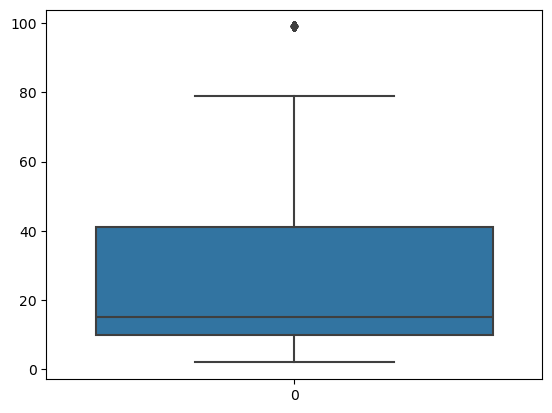

In [608]:
#Data distribution after processing using boxplot
sns.boxplot(df['application'])
plt.show()

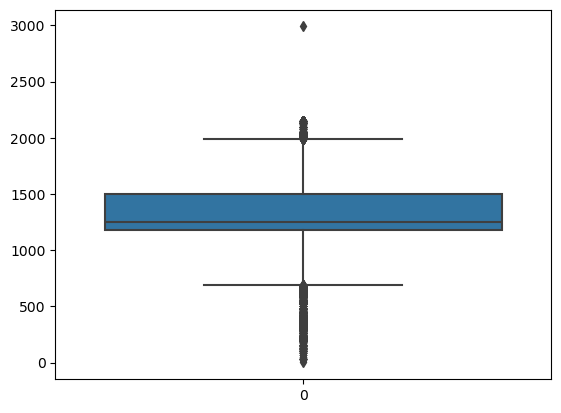

In [609]:
sns.boxplot(df['width'])
plt.show()

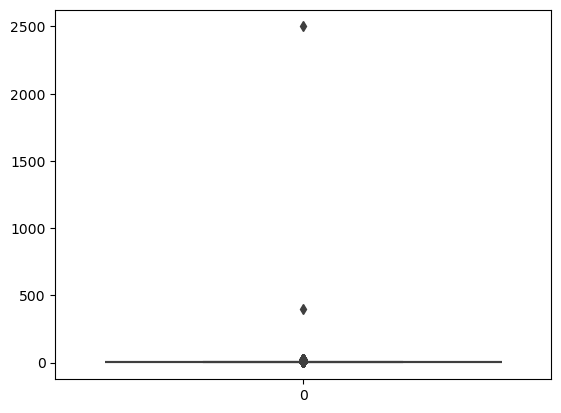

In [610]:
sns.boxplot(df['thickness'])
plt.show()

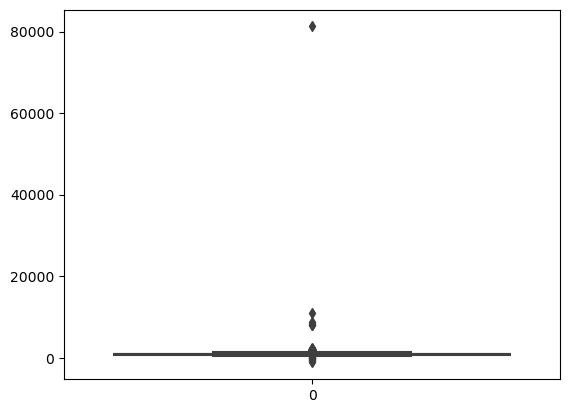

In [611]:
sns.boxplot(df['selling_price'])
plt.show()

In [612]:


# Select the columns for anomaly detection
features = df[['width', 'selling_price', 'thickness', 'application', 'quantity tons', 'Delivery_time']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=4)

# Fit the model
iso_forest.fit(features)

# Predict anomalies (-1 for anomalies, 1 for normal points)
df['anomaly'] = iso_forest.predict(features)

print(df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


                                          id   item_date  quantity tons  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE  2021-04-01      54.151139   
1       4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  2021-04-01     768.024839   
2       E140FF1B-2407-4C02-A0DD-780A093B1158  2021-04-01     386.127949   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50  2021-04-01     202.411065   
4       4E1C4E78-152B-430A-8094-ADD889C9D0AD  2021-04-01     785.526262   
...                                      ...         ...            ...   
181668  DE633116-D1DF-4846-982E-55EFC3658A76  2020-07-02     102.482422   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB  2020-07-02     208.086469   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320  2020-07-02       4.235594   
181671  7AFFD323-01D9-4E15-B80D-7D1B03498FC8  2020-07-02   -2000.000000   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC  2020-07-02     406.686538   

          customer  country  status  item type  application  thickness  \
0       30156308.0     28

In [613]:
cleaned_data_ = df[df['anomaly'] != -1]
print(cleaned_data_)

                                          id   item_date  quantity tons  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE  2021-04-01      54.151139   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50  2021-04-01     202.411065   
5       FE372230-29B1-4A29-BB73-CB9D3078C286  2021-04-01     225.790676   
7       AA3F18A2-A7D6-43DE-8644-F0632AE2CB68  2021-04-01     113.387124   
8       2851F48B-DA32-4DF3-884B-17A3100DD65A  2021-04-01      69.071853   
...                                      ...         ...            ...   
181668  DE633116-D1DF-4846-982E-55EFC3658A76  2020-07-02     102.482422   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB  2020-07-02     208.086469   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320  2020-07-02       4.235594   
181671  7AFFD323-01D9-4E15-B80D-7D1B03498FC8  2020-07-02   -2000.000000   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC  2020-07-02     406.686538   

          customer  country  status  item type  application  thickness  \
0       30156308.0     28

In [614]:
##removing values less than or equal to zero
a = cleaned_data_['selling_price'] <= 0
print(a.sum())
#cleaned_data.loc[a, 'selling_price'] = np.nan

a = cleaned_data_['quantity tons'] <= 0
print(a.sum())

#cleaned_data_if.loc[a, 'quantity tons'] = np.nan

a = cleaned_data_['thickness'] <= 0
print(a.sum())

a = cleaned_data_['width'] <= 0
print(a.sum())


a = cleaned_data_['Delivery_time'] <= 0
print(a.sum())

4
3
0
0
345


In [615]:
cleaned_data_ = cleaned_data_[cleaned_data_['selling_price'] > 0]
cleaned_data_ = cleaned_data_[cleaned_data_['quantity tons'] > 0]
cleaned_data_ = cleaned_data_[cleaned_data_['thickness'] > 0]
cleaned_data_ = cleaned_data_[cleaned_data_['width'] > 0]
cleaned_data_ = cleaned_data_[cleaned_data_['Delivery_time'] > 0]

In [616]:
a = cleaned_data_['selling_price'] <= 0
print(a.sum())
#cleaned_data.loc[a, 'selling_price'] = np.nan

a = cleaned_data_['quantity tons'] <= 0
print(a.sum())

#cleaned_data_if.loc[a, 'quantity tons'] = np.nan

a = cleaned_data_['thickness'] <= 0
print(a.sum())

a = cleaned_data_['width'] <= 0
print(a.sum())

a = cleaned_data_['Delivery_time'] <= 0
print(a.sum())

0
0
0
0
0


C:\Users\rajij\AppData\Local\Temp\ipykernel_13280\3221454288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data_['quantity tons_log'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


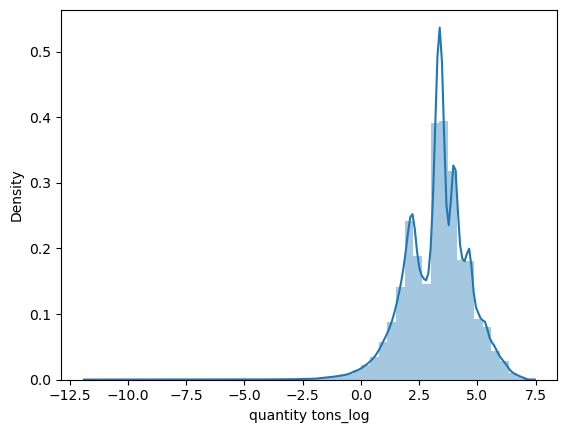

C:\Users\rajij\AppData\Local\Temp\ipykernel_13280\3221454288.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data_['selling_price_log'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


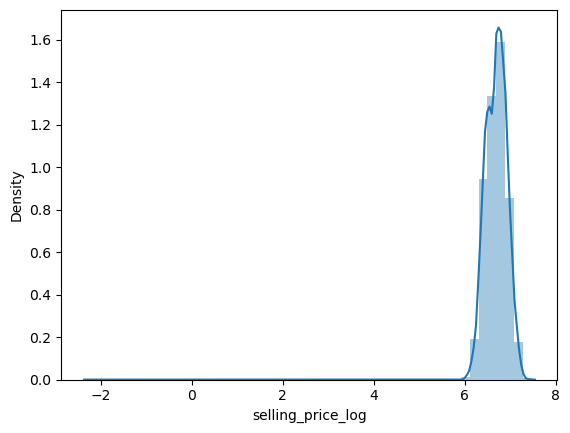

C:\Users\rajij\AppData\Local\Temp\ipykernel_13280\3221454288.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data_['thickness_log'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


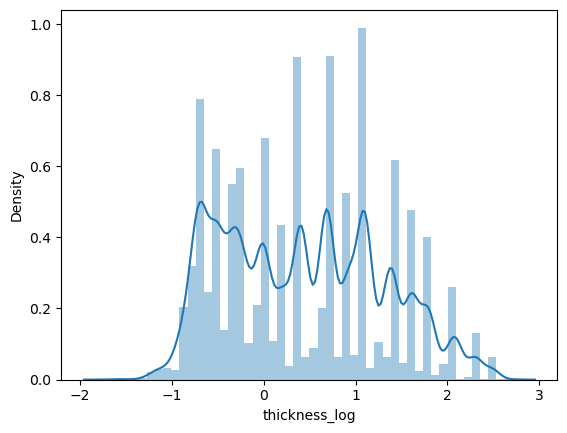

C:\Users\rajij\AppData\Local\Temp\ipykernel_13280\3221454288.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data_['width_log'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


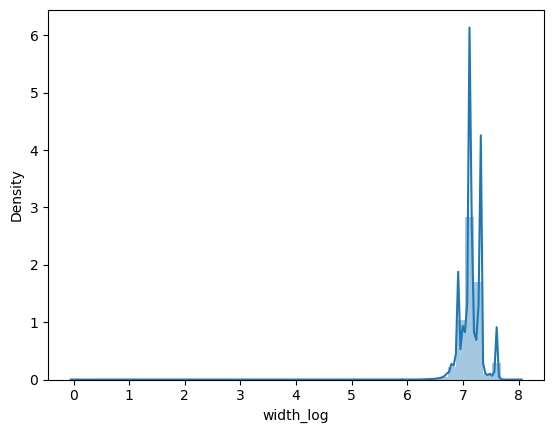

C:\Users\rajij\AppData\Local\Temp\ipykernel_13280\3221454288.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data_['Delivery_time_log'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


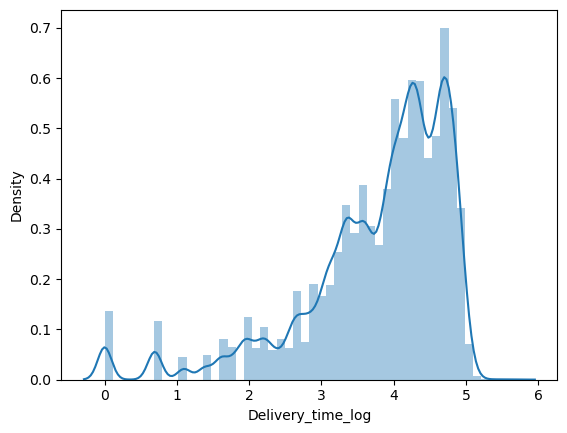

In [617]:
##data transformation using log function
cleaned_data_['quantity tons_log'] = np.log(cleaned_data_['quantity tons'])
sns.distplot(cleaned_data_['quantity tons_log'])
plt.show()

cleaned_data_['selling_price_log'] = np.log(cleaned_data_['selling_price'])
sns.distplot(cleaned_data_['selling_price_log'])
plt.show()

cleaned_data_['thickness_log'] = np.log(cleaned_data_['thickness'])
sns.distplot(cleaned_data_['thickness_log'])
plt.show()

cleaned_data_['width_log'] = np.log(cleaned_data_['width'])
sns.distplot(cleaned_data_['width_log'])
plt.show()

cleaned_data_['Delivery_time_log'] = np.log(cleaned_data_['Delivery_time'])
sns.distplot(cleaned_data_['Delivery_time_log'])
plt.show()

In [618]:
cleaned_data_.shape

(135044, 21)

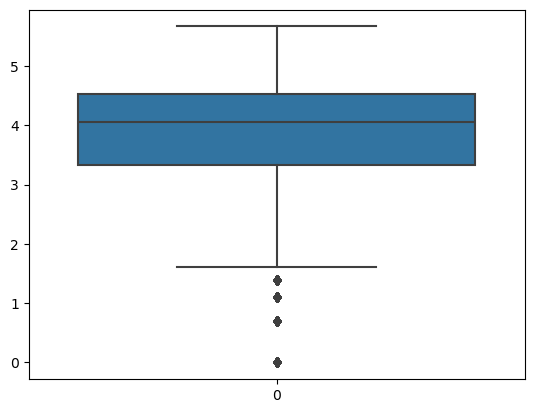

In [619]:
sns.boxplot(cleaned_data_['Delivery_time_log'])
plt.show()

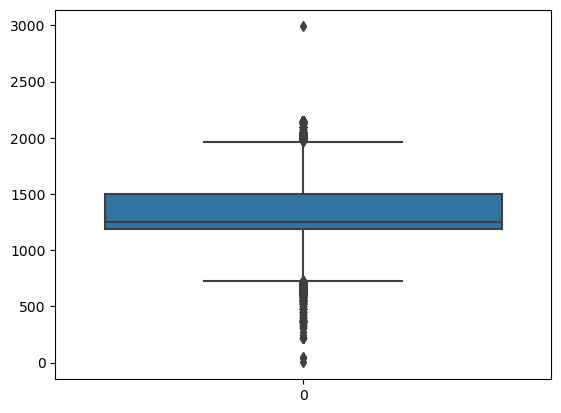

In [620]:
sns.boxplot(cleaned_data_['width'])
plt.show()

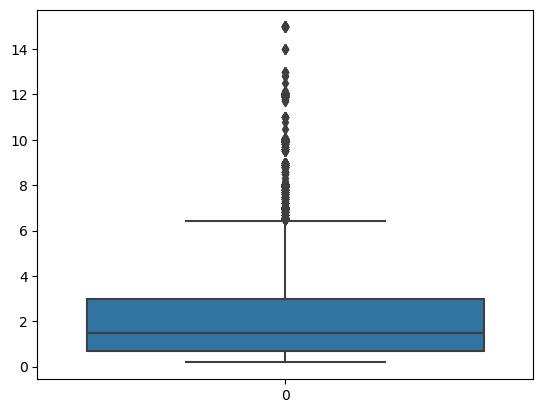

In [621]:
sns.boxplot(cleaned_data_['thickness'])
plt.show()

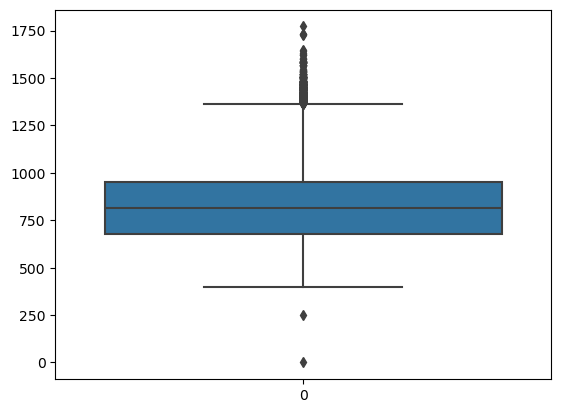

In [622]:
sns.boxplot(cleaned_data_['selling_price'])
plt.show()

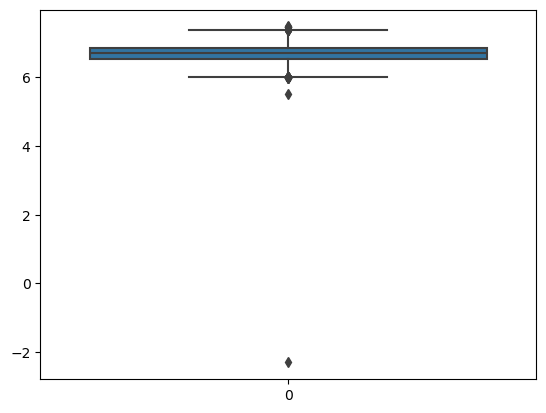

In [623]:
sns.boxplot(cleaned_data_['selling_price_log'])
plt.show()

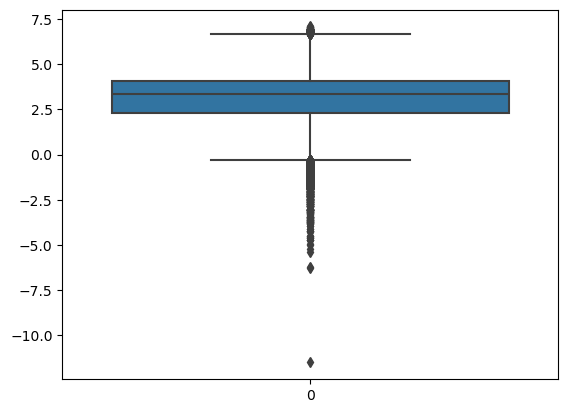

In [624]:
sns.boxplot(cleaned_data_['quantity tons_log'])
plt.show()

In [625]:
cleaned_data_['status'].value_counts()

status
1.0    104140
0.0     30904
Name: count, dtype: int64

In [626]:
cleaned_data_['selling_price_log'].isna().sum()

0

In [627]:
cleaned_data_['Delivery_time_log'].isna().sum()

0

In [628]:
cleaned_data_ = cleaned_data_.dropna(subset=['selling_price_log'])

In [629]:
cleaned_data_['status'].value_counts()

status
1.0    104140
0.0     30904
Name: count, dtype: int64

In [630]:
cleaned_data_['status'].value_counts()

status
1.0    104140
0.0     30904
Name: count, dtype: int64

In [631]:
cleaned_data_['item type'].value_counts()

item type
5.0    83332
3.0    47269
2.0     3840
1.0      337
6.0      239
0.0       26
4.0        1
Name: count, dtype: int64

In [632]:
cleaned_data_['country'].value_counts()

country
78.0     26239
26.0     19043
25.0     18357
32.0     15097
27.0     12424
28.0     12218
84.0      8716
77.0      8155
30.0      7341
39.0      2420
79.0      1470
38.0      1169
40.0      1077
80.0       721
113.0      512
89.0        85
Name: count, dtype: int64

In [633]:
cleaned_data_.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,...,product_ref,delivery date,selling_price,Delivery_time,anomaly,quantity tons_log,selling_price_log,thickness_log,width_log,Delivery_time_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,...,23.0,2021-07-01,854.0,91.0,1,3.991779,6.749931,0.693147,7.313220,4.51086
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,1.0,3.0,59.0,2.30,1317.0,...,21.0,2021-01-01,768.0,90.0,1,5.310301,6.643790,0.832909,7.183112,4.49981
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2021-04-01,113.387124,30342192.0,32.0,1.0,5.0,41.0,0.68,1220.0,...,2.0,2021-01-01,931.0,90.0,1,4.730808,6.836259,-0.385662,7.106606,4.49981
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,69.071853,30341428.0,38.0,1.0,3.0,10.0,0.60,1275.0,...,19.0,2021-07-01,1363.0,91.0,1,4.235147,7.217443,-0.510826,7.150701,4.51086
11,CA076845-2EDE-4C02-95BE-6C7B842026E8,2021-04-01,113.995666,30342192.0,32.0,1.0,5.0,41.0,0.55,1220.0,...,2.0,2021-01-01,954.0,90.0,1,4.736160,6.860664,-0.597837,7.106606,4.49981


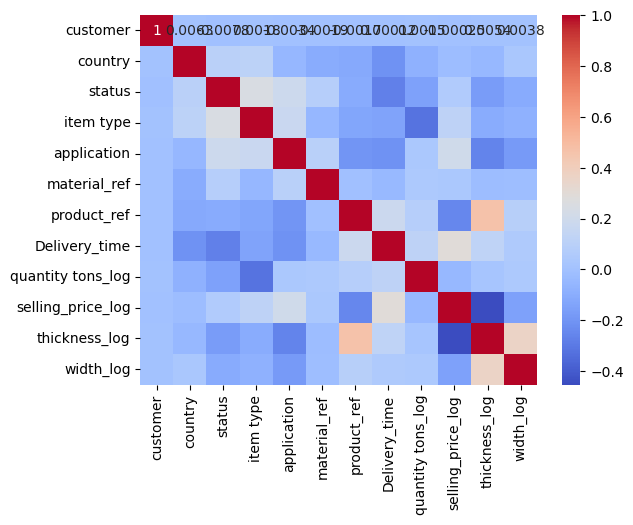

In [634]:
sns.heatmap(cleaned_data_.drop(['id','item_date','delivery date','anomaly','selling_price','thickness','quantity tons', 'width', 'Delivery_time_log'], axis=1).corr(), cmap='coolwarm', annot=True)
plt.show()

In [635]:
## Regression modelling

In [636]:
#split data into X, y
x=cleaned_data_[['application','thickness_log','width_log','country','product_ref', 'quantity tons_log','customer','status','item type', 'material_ref', 'Delivery_time_log']]
y=cleaned_data_['selling_price_log']

In [637]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)scaler.transform(x)


array([[-0.85490254,  0.31063892,  0.87919901, ...,  0.767665  ,
         0.97738724,  0.7198115 ],
       [ 2.13557813,  0.47286301,  0.16833401, ..., -1.16468327,
         0.97738724,  0.70891967],
       [ 1.03703421, -0.94155396, -0.24966366, ...,  0.767665  ,
        -0.46483476,  0.70891967],
       ...,
       [ 1.03703421, -0.55344591,  0.87919901, ...,  0.767665  ,
        -0.46483476, -3.7265468 ],
       [ 1.03703421, -0.89144328, -0.11693751, ...,  0.767665  ,
        -0.46483476, -3.7265468 ],
       [ 1.03703421, -0.89144328, -0.16082228, ...,  0.767665  ,
        -0.46483476, -3.7265468 ]])

In [638]:
cleaned_data_.shape

(135044, 21)

In [639]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=44)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [640]:
x_train.shape

(108035, 11)

In [641]:
x_train.head()

,application,thickness_log,width_log,country,product_ref,quantity tons_log,customer,status,item type,material_ref,Delivery_time_log
176866,10.0,0.182322,6.572283,84.0,5.0,3.409862,30267349.0,1.0,5.0,41.0,1.945910
162089,56.0,-0.579818,7.114769,77.0,9.0,5.708136,30329913.0,1.0,3.0,41.0,3.367296
106597,10.0,1.098612,7.212294,78.0,21.0,6.405814,30223403.0,0.0,3.0,41.0,3.951244
60951,10.0,-0.223144,7.130899,28.0,2.0,3.092819,30272262.0,0.0,5.0,41.0,4.330733
155967,41.0,0.559616,6.966024,25.0,9.0,2.122699,30153920.0,1.0,5.0,31.0,2.079442


In [642]:
y_train.shape

(108035,)

In [643]:
x_test.shape

(27009, 11)

In [644]:
y_test.shape

(27009,)

In [645]:
from sklearn.linear_model import LinearRegression
linearR = LinearRegression()
linearR.fit(x_train, y_train)


LinearRegression()

In [646]:
linearR.coef_

array([ 1.86393860e-03, -1.15693910e-01,  2.96603987e-02, -3.04427445e-04,
       -1.97869042e-03, -1.02298798e-02,  6.57841131e-11,  4.11793721e-03,
        1.76316838e-02,  9.07785851e-04,  7.12171845e-02])

In [647]:
linearR.intercept_

6.174761010136444

In [648]:
Prediction_x_Test = linearR.predict(x_test)

In [649]:
Prediction_x_Test.shape

(27009,)

In [650]:
Prediction_x_Test

array([6.85366352, 6.65533588, 6.53146202, ..., 6.82337856, 6.71437365,
       6.96637428])

In [651]:
y_test.values

array([6.76849321, 6.89442685, 6.30627529, ..., 6.94312242, 6.7787849 ,
       6.94697599])

In [652]:
##Evaluation using MSE, RMSE, R2

In [653]:
from sklearn.metrics import mean_squared_error, r2_score
import math


In [654]:
#Evalution of Test set
print(f'MSE: {mean_squared_error(y_test, Prediction_x_Test)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test, Prediction_x_Test))}')
print(f' R2: {r2_score(y_test, Prediction_x_Test)}')

MSE: 0.035048698060367055
RMSE: 0.18721297513892315
 R2: 0.31780173784048515


In [655]:
cleaned_data_['selling_price_log'].describe()

count    135044.000000
mean          6.694737
std           0.228275
min          -2.302585
25%           6.522093
50%           6.705639
75%           6.860664
max           7.479864
Name: selling_price_log, dtype: float64

In [656]:
###train set

In [657]:
Prediction_x_train = linearR.predict(x_train)

In [658]:

#Evalution of train set
print(f'MSE: {mean_squared_error(y_train, Prediction_x_train)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_train, Prediction_x_train))}')
print(f' R2: {r2_score(y_train, Prediction_x_train)}')

MSE: 0.03603374413426385
RMSE: 0.18982556238363643
 R2: 0.31091026240196906


In [659]:
#Accessing performance using Cross Validation
from sklearn.model_selection import cross_validate

In [660]:
#CV thro' R2
crossval = cross_validate(linearR,x,y,scoring = 'r2', cv=10, return_train_score= False)
crossval['test_score']

array([-2.20870638e+00, -1.01509819e+00, -1.61691960e-01,  8.75622703e-03,
        4.86481777e-01,  6.99506921e-02, -1.05078234e-02, -4.54437675e+01,
       -5.19837737e-01, -5.25226261e-01])

In [661]:
crossval['test_score'].mean()

-4.931964711820312

In [662]:
#CV thro' neg RMSE

crossval_mse = cross_validate(linearR,x,y,scoring = 'neg_root_mean_squared_error', cv=5, return_train_score= False)

In [663]:
(crossval_mse['test_score'].mean())*-1

0.3730679649306096

In [664]:
##Regularization

In [665]:
from sklearn.linear_model import Lasso, Ridge

In [666]:
rid = Ridge(alpha = 5)
rid.fit(x_train, y_train)

Ridge(alpha=5)

In [667]:
rid.coef_

array([ 1.86392418e-03, -1.15678991e-01,  2.95967379e-02, -3.04410672e-04,
       -1.97926731e-03, -1.02290304e-02,  6.57804039e-11,  4.11639359e-03,
        1.76305614e-02,  9.07780391e-04,  7.12130169e-02])

In [668]:
rid_list = rid.coef_

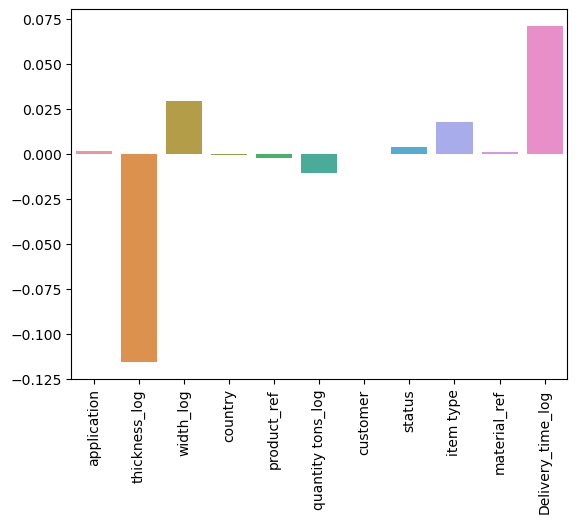

In [669]:
sns.barplot(x=x_train.columns, y= rid_list)
plt.xticks(rotation = 90)
plt.show()

In [670]:
rd_pd = rid.predict(x_test)
print(math.sqrt(mean_squared_error(y_test,rd_pd)))
print(r2_score(y_test, rd_pd))
                

0.1872129711100369
0.3178017672027573


In [671]:
rd_pd = rid.predict(x_train)
print(math.sqrt(mean_squared_error(y_train,rd_pd)))
print(r2_score(y_train, rd_pd))

0.18982556286399438
0.31091025891445423


In [672]:
##Lasso

In [673]:
rlass = Lasso(alpha = 1)
rlass.fit(x_train, y_train)

Lasso(alpha=1)

In [674]:
rlass.coef_

array([ 0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00,
       -0.0000000e+00, -0.0000000e+00,  1.8674856e-12,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00])

In [675]:
rlasso_list = rlass.coef_

In [676]:
rlass_pd = rlass.predict(x_test)
print(math.sqrt(mean_squared_error(y_test,rlass_pd)))
print(r2_score(y_test, rlass_pd))
                

0.22666596071484688
-2.6087378813821616e-05


In [677]:
rlass_pd = rlass.predict(x_train)
print(math.sqrt(mean_squared_error(y_train,rlass_pd)))
print(r2_score(y_train, rlass_pd))
                

0.2286740078672795
2.8396344164960396e-09


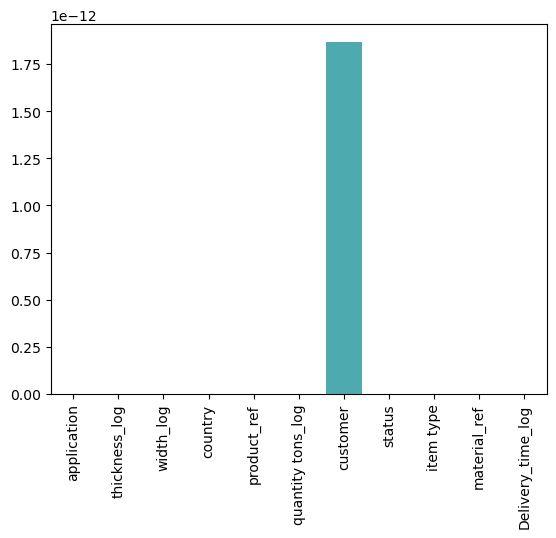

In [678]:
sns.barplot(x=x_train.columns, y= rlasso_list)
plt.xticks(rotation = 90)
plt.show()

In [679]:
###Decision Tree, RandomForestRegressor, GradientBoostingRegressor

In [680]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [681]:
x_train.head()

,application,thickness_log,width_log,country,product_ref,quantity tons_log,customer,status,item type,material_ref,Delivery_time_log
176866,10.0,0.182322,6.572283,84.0,5.0,3.409862,30267349.0,1.0,5.0,41.0,1.945910
162089,56.0,-0.579818,7.114769,77.0,9.0,5.708136,30329913.0,1.0,3.0,41.0,3.367296
106597,10.0,1.098612,7.212294,78.0,21.0,6.405814,30223403.0,0.0,3.0,41.0,3.951244
60951,10.0,-0.223144,7.130899,28.0,2.0,3.092819,30272262.0,0.0,5.0,41.0,4.330733
155967,41.0,0.559616,6.966024,25.0,9.0,2.122699,30153920.0,1.0,5.0,31.0,2.079442


In [682]:
from sklearn.tree import DecisionTreeRegressor
import sklearn
dc_r = DecisionTreeRegressor()
dc_r.fit(x_train, y_train)
train_pred = dc_r.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = dc_r.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (2.0401185582954446e-17, 0.09270047136994738)
R2: (1.0, 0.8327359517620431)


In [683]:
from sklearn.tree import DecisionTreeRegressor
import sklearn
dc_r = DecisionTreeRegressor(max_depth= 30, min_samples_split= 7)
dc_r.fit(x_train, y_train)
train_pred = dc_r.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = dc_r.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.033927990720169464, 0.08996083642512932)
R2: (0.9779868256632086, 0.8424763783738931)


In [684]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [685]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
train_pred = rf.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = rf.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.027904683755197363, 0.07061011575359315)
R2: (0.9851091118423988, 0.9029551337969858)


In [686]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
train_pred = gb.predict(x_train)
mse_train = math.sqrt(mean_squared_error(y_train, train_pred))
pred = gb.predict(x_test)
mse_test = math.sqrt(mean_squared_error(y_test, pred))
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, pred)
print(f'RMSE: {mse_train, mse_test}')
print(f'R2: {r2_train, r2_test}')

RMSE: (0.13928946653881072, 0.1364463169147374)
R2: (0.6289751980570324, 0.6376215581613096)


In [687]:
## classification models

In [688]:
#split data into X, y
a=cleaned_data_[['selling_price_log','item type','application','thickness_log','width_log','country','product_ref', 'material_ref', 'quantity tons_log','customer','Delivery_time_log' ]]
b=cleaned_data_['status' ]

In [689]:
cleaned_data_['status'].value_counts()

status
1.0    104140
0.0     30904
Name: count, dtype: int64

In [690]:
scaler = StandardScaler()
scaler.fit(a)
scaler.transform(a)


array([[ 0.24178904,  0.767665  , -0.85490254, ...,  0.55669391,
        -0.0130188 ,  0.7198115 ],
       [-0.22318553, -1.16468327,  2.13557813, ...,  1.553879  ,
         0.01069877,  0.70891967],
       [ 0.61996703,  0.767665  ,  1.03703421, ...,  1.11561424,
         0.00979285,  0.70891967],
       ...,
       [-1.38566533,  0.767665  ,  1.03703421, ...,  1.57479277,
        -0.00755212, -3.7265468 ],
       [-1.16803582,  0.767665  ,  1.03703421, ..., -1.370527  ,
        -0.00755212, -3.7265468 ],
       [-1.25379464,  0.767665  ,  1.03703421, ...,  2.08157458,
        -0.00755212, -3.7265468 ]])

In [691]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2, random_state=125, stratify=b)


In [692]:
a_train.shape

(108035, 11)

In [693]:
a_train.head()

,selling_price_log,item type,application,thickness_log,width_log,country,product_ref,material_ref,quantity tons_log,customer,Delivery_time_log
22435,7.014814,3.0,56.0,-0.916291,6.802395,77.0,9.0,31.0,3.492533,30329913.0,4.744932
55496,6.666957,5.0,10.0,1.704748,6.984716,78.0,8.0,40.0,1.837130,30165529.0,4.234107
166900,6.502790,3.0,10.0,-0.287682,7.313220,26.0,28.0,31.0,3.614582,30340120.0,4.248495
26720,6.697034,5.0,59.0,0.587787,7.130899,28.0,23.0,41.0,4.999547,30267173.0,4.077537
74613,6.721426,3.0,56.0,-0.733969,7.130899,32.0,5.0,31.0,5.039312,30207233.0,4.663439


In [694]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [695]:
logr = LogisticRegression(max_iter=1000)
logr.fit(a_train, b_train)
train_pred = logr.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = logr.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')



Accuracy: (0.771157495256167, 0.7711503572883113)
Precision: (0.771157495256167, 0.7711503572883113)
Recall: (1.0, 1.0)
F1 Score: (0.8707949432183416, 0.8707903923741036)
AUC: (0.5, 0.5)


In [696]:
klr = KNeighborsClassifier(n_neighbors=5)
klr.fit(a_train, b_train)
train_pred = klr.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = klr.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (0.9580043504419864, 0.9333555481506165)
Precision: (0.9725611585022016, 0.9582410172430401)
Recall: (0.9729930862300749, 0.9552045323602842)
F1 Score: (0.9727770744205303, 0.9567203654724693)
AUC: (0.9402440656648898, 0.9074679837015787)


In [697]:
from sklearn.tree import DecisionTreeClassifier
import sklearn

In [698]:
dc = DecisionTreeClassifier()
dc.fit(a_train, b_train)
train_pred = dc.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = dc.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (1.0, 0.9416120552408457)
Precision: (1.0, 0.9638571635101922)
Recall: (1.0, 0.9602938352218168)
F1 Score: (1.0, 0.9620721999086077)
AUC: (1.0, 0.9194771230792792)


In [699]:
train_pred

array([1., 0., 0., ..., 0., 0., 1.])

In [700]:
b_test

112407    0.0
181538    1.0
91773     1.0
158970    0.0
161603    1.0
         ... 
62110     0.0
107147    0.0
153328    1.0
76790     1.0
2786      1.0
Name: status, Length: 27009, dtype: float64

In [701]:
dc1 = DecisionTreeClassifier(criterion= 'entropy',max_depth= 7, min_samples_split= 14)
dc1.fit(a_train, b_train)
train_pred = dc1.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = dc1.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (0.8303142500115703, 0.8270576474508498)
Precision: (0.8427359804211149, 0.8411096567157877)
Recall: (0.9589014787785674, 0.9564048396389476)
F1 Score: (0.8970736856289442, 0.8950596481768552)
AUC: (0.6779501124427157, 0.6738018373894463)


In [702]:
train_pred

array([1., 1., 0., ..., 1., 1., 1.])

In [703]:
b_test

112407    0.0
181538    1.0
91773     1.0
158970    0.0
161603    1.0
         ... 
62110     0.0
107147    0.0
153328    1.0
76790     1.0
2786      1.0
Name: status, Length: 27009, dtype: float64

In [704]:
from sklearn.ensemble import ExtraTreesClassifier

In [705]:
ec = ExtraTreesClassifier()
ec.fit(a_train, b_train)
train_pred = ec.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = ec.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (1.0, 0.9646414158243548)
Precision: (1.0, 0.9754988754366656)
Recall: (1.0, 0.9787305550220856)
F1 Score: (1.0, 0.9771120431396045)
AUC: (1.0, 0.947948031110784)


In [706]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [707]:
xgb = ExtraTreesClassifier()
xgb.fit(a_train, b_train)
train_pred = xgb.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = xgb.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (1.0, 0.9644933170424673)
Precision: (1.0, 0.975448671931084)
Recall: (1.0, 0.9785865181486461)
F1 Score: (1.0, 0.9770150756177649)
AUC: (1.0, 0.9477951196146887)


In [708]:
gb = GradientBoostingClassifier()
gb.fit(a_train, b_train)
train_pred = gb.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = gb.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (0.8396167908548156, 0.8395349698248732)
Precision: (0.8543427595613743, 0.8541917196358014)
Recall: (0.9548084309583253, 0.954916458613405)
F1 Score: (0.9017860685519298, 0.9017500906782735)
AUC: (0.7031252040323318, 0.7028262927268609)


In [709]:
from sklearn.ensemble import RandomForestClassifier

In [710]:
rfc = RandomForestClassifier()
rfc.fit(a_train, b_train)
train_pred = rfc.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = rfc.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (1.0, 0.9638268725239735)
Precision: (1.0, 0.9745637102557972)
Recall: (1.0, 0.9786345304397925)
F1 Score: (1.0, 0.9765948781831685)
AUC: (1.0, 0.9462821576321273)


In [711]:
rfc = RandomForestClassifier(criterion='gini',max_depth= 7)
rfc.fit(a_train, b_train)
train_pred = rfc.predict(a_train)
train_accuracy = accuracy_score(b_train, train_pred)
train_precision = precision_score(b_train, train_pred)
train_recall = recall_score(b_train, train_pred)
train_f1 = f1_score(b_train, train_pred)
train_auc = roc_auc_score(b_train, train_pred)
pred = rfc.predict(a_test)
accuracy = accuracy_score(b_test, pred)
precision = precision_score(b_test, pred)
recall = recall_score(b_test, pred)
f1 = f1_score(b_test, pred)
auc = roc_auc_score(b_test, pred)
print(f'Accuracy: {train_accuracy, accuracy}')
print(f'Precision: {train_precision, precision}')
print(f'Recall: {train_recall, recall}')
print(f'F1 Score: {train_f1, f1}')
print(f'AUC: {train_auc, auc}')

Accuracy: (0.8332299717684084, 0.832796475248991)
Precision: (0.847835583161977, 0.8469752403641624)
Recall: (0.9551685231419244, 0.9558767044363357)
F1 Score: (0.8983072850522942, 0.8981368701222538)
AUC: (0.6887439104808841, 0.6869660176444743)


In [712]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [713]:
Search_speace = {'criterion': ['gini', 'entropy'],
                'max_depth': [3,4,7,9,10,12,14,20],
                'min_samples_split': [4,6,8,10,12]}
grid = RandomizedSearchCV(dc, Search_speace, cv=5, n_iter= 100, scoring = 'accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(a,b)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 8, 'max_depth': 7, 'criterion': 'entropy'}
0.8029679186716592


In [714]:
Search_speace = {'criterion': ['gini', 'entropy'],
                'max_depth': [2,6,7,15],
                'min_samples_split': [4,10,14,20]}
grid = GridSearchCV(dc, Search_speace, cv=5, scoring = 'accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(a,b)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 14}
0.8030197546161986


In [715]:
Ss = {'max_depth': [3,4,7,9,10,12,14,20,24,26], 'min_samples_split': [4,6,8,10,12]}
grid = GridSearchCV(dc_r, param_grid=Ss, cv=5)
grid_search = grid.fit(x,y)
print(grid_search.best_params_)


{'max_depth': 7, 'min_samples_split': 10}


In [716]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities


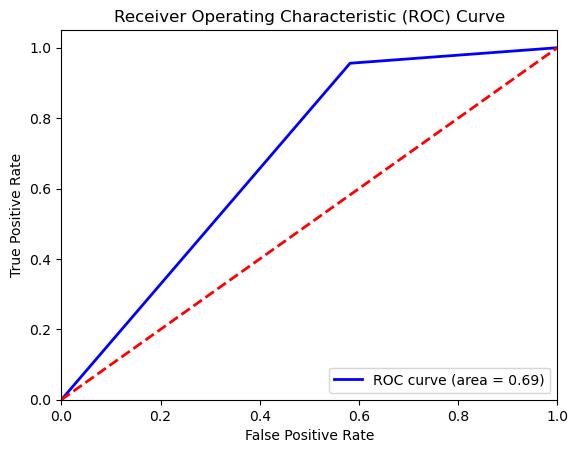

In [717]:
# ROC curve and AUC
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(b_test, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [718]:

cleaned_data_['product_ref'].value_counts()

product_ref
2.0     34285
9.0     23205
8.0     17760
23.0    15310
5.0     15118
21.0    10564
7.0      6222
24.0     3934
14.0     3825
28.0     1492
19.0      946
4.0       519
11.0      446
20.0      275
29.0      260
13.0      203
16.0      144
30.0      134
26.0      131
3.0        96
25.0       51
1.0        44
22.0       41
27.0       17
10.0       13
15.0        4
0.0         2
6.0         2
12.0        1
Name: count, dtype: int64

In [719]:
# Predict the status for a new sample



input_data = {
   'item type': ['W'],
   'application': [10.0],
   'country': [78.0],
   'product_ref': [1668701718],
   'selling_price_log': [1283.99],
   'quantity tons_log': [1144.45],
   'thickness_log': [4.0],
   'width_log': [1500.00],
   'customer': [30223403],
   'material_ref': ['NaN'],
   'Delivery_time_log': [22]       
}
input_data = pd.DataFrame(input_data)



input_data['item type'] = OE1.transform(input_data[['item type']])
input_data['material_ref'] = OE2.transform(input_data[['material_ref']])
input_data['product_ref'] = OE3.transform(input_data[['product_ref']])
input_data['width_log'] = np.log(input_data['width_log'])
input_data['quantity tons_log'] = np.log(input_data['quantity tons_log'])
input_data['thickness_log'] = np.log(input_data['thickness_log'])
input_data['selling_price_log'] = np.log(input_data['selling_price_log']) 
input_data['Delivery_time_log'] = np.log(input_data['Delivery_time_log'])

input_data=input_data[['selling_price_log','item type','application','thickness_log','width_log','country','product_ref', 'material_ref', 'quantity tons_log','customer', 'Delivery_time_log' ]]

input_data_s = scaler.transform(input_data)     
new_pred = dc1.predict(input_data_s)

print(new_pred)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')



[1.]
The status is: Won


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
